In [3]:
!pip install -r requirements.txt -q

In [4]:
from shapely.geometry import Point, LineString, Polygon

In [5]:
p1 = Point(5.4, 3.0)
p2 = Point(10, -7)
p3 = Point(80, 25)

p3D = Point(5.4, 3.0, 25)

In [9]:
print(p1)
print(p3D)

print(type(p2))
print(type(p3D))

POINT (5.4 3)
POINT Z (5.4 3 25)
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>


In [11]:
p_coord = p1.coords
p_coord

In [12]:
p_coord.xy

(array('d', [5.4]), array('d', [3.0]))

In [13]:
x = p1.x
y = p1.y
print(x, y)

5.4 3.0


In [17]:
p_dist = p1.distance(p2)
p_dist

11.00727032465361

In [19]:
print('Distancia en grados decimales: {}'.format(round(p_dist, 2)))

Distancia en grados decimales: 11.01


# Lineas

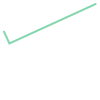

In [22]:
linea = LineString([p1, p2, p3])
linea

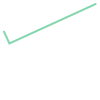

In [23]:
linea2 = LineString([(5.4, 3.0), (10, -7), (80, 25)])
linea2

In [25]:
print(linea)
type(linea)

LINESTRING (5.4 3, 10 -7, 80 25)


shapely.geometry.linestring.LineString

In [26]:
lxy = linea.xy
print(lxy)

(array('d', [5.4, 10.0, 80.0]), array('d', [3.0, -7.0, 25.0]))


In [29]:
lx = linea.xy[0]
ly = linea.xy[1]
print(lx, ly)

array('d', [5.4, 10.0, 80.0]) array('d', [3.0, -7.0, 25.0])


In [35]:
l_longitud = linea.length
print(l_longitud)

87.97479594422904


In [34]:
l_centroide = linea.centroid
print(l_centroide)

POINT (40.33308172297599 7.623697022861553)


In [33]:
type(l_centroide)

shapely.geometry.point.Point

# Poligono

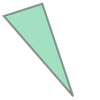

In [38]:
plgn = Polygon([(5.5, 4.2), (10, -1), (8, 5)])
plgn

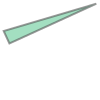

In [39]:
plgn2 = Polygon([(p.x, p.y) for p in [p1, p2, p3]])
plgn2

In [43]:
print(plgn)

POLYGON ((5.5 4.2, 10 -1, 8 5, 5.5 4.2))


In [40]:
plgn.geom_type

'Polygon'

In [41]:
p1.geom_type

'Point'

In [42]:
linea.geom_type

'LineString'

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


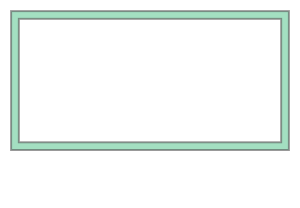

In [50]:
plg_ext = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

hueco = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

plg = Polygon(shell=plg_ext, holes=hueco)
print(plg)
plg

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


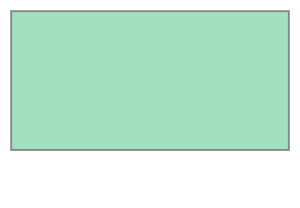

In [51]:
plg = Polygon(shell=plg_ext)
print(plg)
plg

In [52]:
centroide = plg.centroid
area = plg.area
bbox = plg.bounds

print(centroide)
print(area)
print(bbox)

POINT (0 0)
64800.0
(-180.0, -90.0, 180.0, 90.0)


LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)


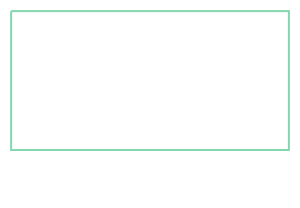

In [56]:
exterior = plg.exterior
print(exterior)
exterior

In [57]:
longitud = plg.length
print(longitud)
longitud

1080.0


1080.0

# Objetos

In [59]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

In [60]:
multi_pts = MultiPoint([p1, p2, p3])
multi_pts2 = MultiPoint([(5.4, 3.0), (10, -7), (80, 25)])

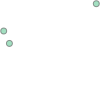

In [68]:
multi_pts

In [61]:
l1 = LineString([p1, p2])
l2 = LineString([p2, p3])

multi_line = MultiLineString([l1, l2])

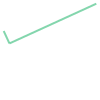

In [67]:
multi_line

Hemisferio occidental

POLYGON ((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80))


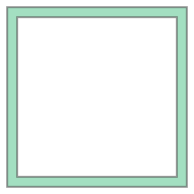

In [62]:
oc_ext = [(-180, 90), (-180, -90), (0, -90), (0, 90)]
oc_int = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

oc_pol = Polygon(shell=oc_ext, holes=oc_int)
print(oc_pol)
oc_pol

Hemisferio oriental

POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


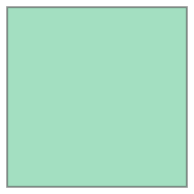

In [64]:
min_x, min_y = 0, -90
max_x, max_y = 180, 90

or_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
print(or_box)
or_box

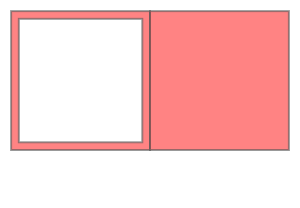

In [66]:
multi_plg = MultiPolygon([oc_pol, or_box])
multi_plg

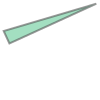

In [73]:
# Crear polígono convexo a partir de los puntos
conv_plg = multi_pts.convex_hull
conv_plg

In [72]:
# Cantidad de lineas
n_line = len(multi_line.geoms)
n_line

2

In [74]:
# Calcular el área del multi-polígono
area_multi = multi_plg.area
area_multi

39200.0

In [78]:
# Calcular el área de una parte del polígono convexo
oc_area = multi_plg.geoms[0].area
oc_area

6800.0

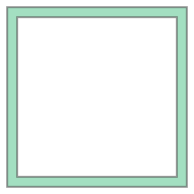

In [79]:
# Polígono seleccionado como lista
multi_plg.geoms[0]

In [81]:
# Validamos si es un polígono válido
# En este caso, los polígonos se superponen, por lo que no es válido
val = multi_plg.is_valid
val

False